In [46]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms 

In [47]:
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

batch_size = 64
num_epochs = 4
learning_rate = 0.001

train_data = torchvision.datasets.CIFAR10(root= "./data", train=True, download=True, transform=transform )
test_data = torchvision.datasets.CIFAR10(root= "./data", train=False, download=True, transform=transform )

train_loader=torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle= False)
test_loader=torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle= False)

classes = ("plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

Files already downloaded and verified
Files already downloaded and verified


In [48]:
test_loader_size = len(test_loader.dataset)
print("The size of the testing dataset is " + str(test_loader_size))

train_loader_size = len(train_loader.dataset)
print("The size of the training dataset is " + str(train_loader_size))

The size of the testing dataset is 10000
The size of the training dataset is 50000


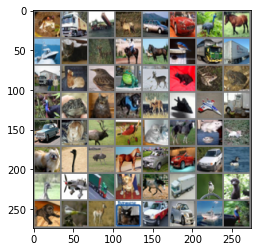

In [49]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
dataiter = iter(train_loader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))

In [50]:
import torch.nn as nn
import torch.nn.functional as F

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        #layer 1
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2,2)
        
        #layer 2 
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        #layer 3
        self.fc1 = nn.Linear(16*5*5, 120) 
        
        #layer 4
        self.fc2 = nn.Linear(120, 100)
        
        #layer 5
        self.fc3 = nn.Linear(100, 10)
        
    def forward(self,x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1,16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

        
model = ConvNet()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
criterion = nn.CrossEntropyLoss()

In [51]:
train_loss = 0
#training the model
for epoch in range(num_epochs):
  for i, data in enumerate(train_loader, 0):
    # get the inputs; data is a list of [inputs, labels]
      inputs, labels = data

      # zero the parameter gradients
      optimizer.zero_grad()

      # forward + backward + optimize
      outputs = model(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()

      train_loss += loss.item()
  print(train_loss / len(train_loader))
  train_loss = 0

2.2985416751383516
2.149449245856546
1.9047316340229394
1.7207614758130534


In [52]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        # making predictions
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for {classname} : {accuracy}%')

Accuracy for plane : 46.7%
Accuracy for car : 70.7%
Accuracy for bird : 8.6%
Accuracy for cat : 36.1%
Accuracy for deer : 18.3%
Accuracy for dog : 38.1%
Accuracy for frog : 64.4%
Accuracy for horse : 48.8%
Accuracy for ship : 39.9%
Accuracy for truck : 31.2%
